In [1]:
import pandas as pd
from Levenshtein import editops, distance
from collections import Counter
import re

In [6]:
df = pd.read_csv('a_utf8.csv', encoding='utf-8', low_memory=False)
df = df.drop(columns=['Unnamed: 0'])

In [7]:
df_unique = df.iloc[:9271].drop_duplicates(subset='n_gram')

In [8]:
df_unique.head()

,raw_ngram,year,match_count,volume_count,idx,n_gram,new_idx,is_bastard,new_ngram
0,А.6,1841,1,1,a,А.6,NaN,NaN,NaN
5,А.Ахматовой,1717,2,1,a,А.Ахматовой,NaN,0.0,NaN
6,А.Шахматова,1898,1,1,a,А.Шахматова,NaN,0.0,NaN
11,А1Ре_NOUN,1916,1,1,a,А1Ре,NaN,NaN,NaN
12,АВВЕ,1878,1,1,a,АВВЕ,NaN,NaN,NaN


In [9]:
len(df_unique)

514

In [10]:
def not_russian(string):
        s = re.sub("[.,:\'-]", '', string)
        charRe = re.compile(r'[a-zA-Z]')
        st = charRe.search(s)
        return bool(st) #or bool(re.search(r'\d', s) or bool(re.search(r'[^a-zа-яёіѳѣ ]+', string)))

In [11]:
df_unique['decision']=['transliteration' if not_russian(str(df_unique['new_ngram'].iloc[[i]][j])) \
                       and df_unique['new_ngram'].iloc[[i]].notna()[j]\
                       else 'less than five symbols' if len(df_unique['n_gram'].iloc[[i]][j])<5 \
                       else 'corrected' if df_unique['new_ngram'].iloc[[i]].notna()[j] \
                       else 'correct' if df_unique['is_bastard'].iloc[[i]].notna()[j] \
                       and df_unique['new_ngram'].iloc[[i]].isna()[j] \
                       else 'no decision' for i, j in zip(range(len(df_unique)), df_unique.index.tolist())]

In [12]:
new_na = df_unique[df_unique['new_ngram'].isna()]
df_unique.loc[new_na.index, ['new_ngram']] = [e for e in new_na['n_gram']]

In [14]:
df_unique.to_csv('val_df.csv',index=False)

In [13]:
df_unique[:60]

,raw_ngram,year,match_count,volume_count,idx,n_gram,new_idx,is_bastard,new_ngram,decision
0,А.6,1841,1,1,a,А.6,NaN,NaN,А.6,less than five symbols
5,А.Ахматовой,1717,2,1,a,А.Ахматовой,NaN,0.0,А.Ахматовой,correct
6,А.Шахматова,1898,1,1,a,А.Шахматова,NaN,0.0,А.Шахматова,correct
11,А1Ре_NOUN,1916,1,1,a,А1Ре,NaN,NaN,А1Ре,less than five symbols
12,АВВЕ,1878,1,1,a,АВВЕ,NaN,NaN,АВВЕ,less than five symbols
22,АК0,1916,1,1,a,АК0,NaN,NaN,АК0,less than five symbols
23,АКАДЕНШ,1836,1,1,a,АКАДЕНШ,NaN,NaN,АКАДЕМІИ,corrected
58,АЛЕКСЕ_NOUN,1788,1,1,a,АЛЕКСЕ,NaN,0.0,АЛЕКСЕ,correct
62,АМТ_NOUN,1857,1,1,a,АМТ,NaN,NaN,АМТ,less than five symbols
64,АННЕНКОВУ,1853,1,1,a,АННЕНКОВУ,NaN,0.0,АННЕНКОВУ,correct


##### Что есть что из проверенных (меньше четырех символов не исправляем)

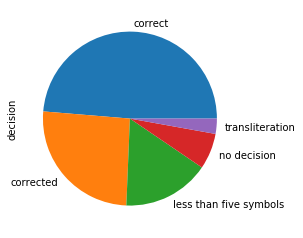

In [29]:
df_unique['decision'].value_counts().plot.pie()

###### Анализ ошибок

In [39]:
unique_errors = df[df['new_ngram'].notna()].drop_duplicates(subset='n_gram')

In [40]:
unique_all = pd.concat([unique_errors, df[df['is_bastard']==0]], axis=0, ignore_index=True).drop_duplicates(subset='n_gram')

In [41]:
len(unique_all)

384

In [42]:
not_to_correct = unique_all[unique_all['is_bastard']==0]

In [43]:
unique_all.loc[not_to_correct.index, ['new_ngram']] = not_to_correct['n_gram']

In [139]:
# unique_errors = unique_all[df['is_bastard'].isna()]
# unique_all.loc[unique_errors.index, ['is_bastard']] = [1 for e in range(len(unique_errors))]

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [44]:
unique_all.head()

,raw_ngram,year,match_count,volume_count,idx,n_gram,new_idx,is_bastard,new_ngram
0,АКАДЕНШ,1836,1,1,a,АКАДЕНШ,NaN,NaN,АКАДЕМІИ
1,АРОДНОЕ,1885,2,2,a,АРОДНОЕ,NaN,NaN,НАРОДНОЕ
2,Авгуота_NOUN,1835,1,1,a,Авгуота,NaN,1.0,Августа
3,Августь_NOUN,1782,1,1,a,Августь,NaN,1.0,Августъ
4,Австрж_NOUN,1813,2,1,a,Австрж,NaN,1.0,Австріи


In [45]:
corrections = unique_errors['new_ngram'].astype(str).tolist()
errors = unique_errors['n_gram'].astype(str).tolist()

In [46]:
with_all = unique_all['new_ngram'].astype(str).tolist()
with_errors = unique_all['n_gram'].astype(str).tolist()

In [47]:
dists=[]
edit_ops=[]

In [48]:
for pair in zip(corrections, errors):
    print(pair)
    dists.append(distance(pair[0],pair[1]))

('АКАДЕМІИ', 'АКАДЕНШ')
('НАРОДНОЕ', 'АРОДНОЕ')
('Августа', 'Авгуота')
('Августъ', 'Августь')
('Австріи', 'Австрж')
('Агаѳангела', 'Агаоангела')
('Аѳанасьевской', 'Аеанасьевской')
('Аѳонасій', 'Аеонасш')
('Аѳонѣ', 'Аеонт')
('Auger', 'Аидег')
('Australian', 'Аиз1гаНап')
('Аксаковъ', 'Акеаковъ')
('Алазани', 'Алазапи')
('Алекcея', 'Алекеея')
('Алексѣй', 'АлексЪй')
('Александринскаго', 'Александрннскаго')
('Александровича', 'Александровича2')
('Александровскаго', 'Александровскаю')
('Алексѣя', 'Алексая')
('Альпійскую', 'Альшйскую')
('Амфилохія', 'Амфилохгя')
('Анастасія', 'Анасташ')
('Анатоліе', 'Анатолге')
('Андреевичъ', 'Андреевпчъ')
('Апостолы', 'Аностолы')
('Apatea', 'Аратеа')
('Арестованіе', 'Арестоваше')
('Арзамасскій', 'Арзамасскш')
('Арсен', 'Арсеи')
('Артиллерійскаго', 'АртиллерШскаго')
('Друга', 'Аруга')
('Архангельскій', 'Архангельскш')
('Арханг', 'Архаш')
('Архіерейскаго', 'Архгерейскаго')
('Архимандритовъ', 'АрхимандритовЪ')
('Aceraceae', 'Асегасеае')
('Афанасій', 'Афанасш')
(

In [49]:
dist_counts = Counter(dists)

In [50]:
print('''
{} % of errors have edit distance 1\n
{} % of errors have edit distance 2\n
{} % of errors have edit distance 3\n
{} % of errors have edit distance more than 3 (probably it is transliteration)
'''.format(round(dist_counts[1]/len(dists)*100,2), 
           round(dist_counts[2]/len(dists)*100,2), 
           round(dist_counts[3]/len(dists)*100,2),
           round((len(dists)-dist_counts[1]-dist_counts[2]-dist_counts[3])/len(dists)*100),2))


58.04 % of errors have edit distance 1

21.68 % of errors have edit distance 2

9.09 % of errors have edit distance 3

11 % of errors have edit distance more than 3 (probably it is transliteration)



##### Попробуем построить матрицы ошибок

In [258]:
error_df=''

In [259]:
for pair in zip(with_all, with_errors):
    if len(editops(pair[0],pair[1]))==1 or len(editops(pair[0],pair[1]))==0:
        if len(editops(pair[0],pair[1]))==1:
            editop, idxw, idxx = editops(pair[0],pair[1])[0]
            if editop == 'replace':
                correct_char=pair[0][idxw]
                error_char=pair[1][idxx]
                ew=pair[1][idxx]+'|'+pair[0][idxw]
            elif editop == 'insert':
                correct_char = '-'
                error_char = pair[1][idxx]
                ew=pair[1][idxx-1:idxx+1]+'|'+pair[0][idxw-1]
            elif editop == 'delete':
                correct_char = pair[0][idxw]
                error_char = '-'
                if idxx!=0:
                    ew=pair[1][idxx-1]+'|'+pair[0][idxw-1:idxw+1]
                else:
                    ew=pair[1][idxx]+'|'+pair[0][idxw:idxw+2]
            df_temp = pd.DataFrame([[pair[0],
                                  pair[1],
                                  editop,
                                  correct_char,
                                 idxw,
                                 error_char,
                                 idxx,
                                 ew]],columns=['correction',
                                               'error', 
                                               'editop', 
                                                             'correct_char',
                                                           'idxw',
                                                             'error_char',
                                                           'idxe',
                                                             'e|w'])

        elif len(editops(pair[0],pair[1]))==0:
            editop, idxw, idxx = ('equal', 0, 0)
            correct_char = '-'
            error_char = '-'
            ew='|'
            df_temp = pd.DataFrame([[pair[0],
                                      pair[1],
                                      editop,
                                      correct_char,
                                     idxw,
                                     error_char,
                                     idxx,
                                     ew]],columns=['correction',
                                                   'error', 
                                                   'editop', 
                                                   'correct_char',
                                                   'idxw',
                                                   'error_char',
                                                               'idxe',
                                                                 'e|w'])
        if not len(error_df):
            error_df=df_temp
        else:
            error_df=pd.concat([error_df,df_temp],axis=0,ignore_index=True)
    else:
        pass

In [260]:
error_df[:20]

,correction,error,editop,correct_char,idxw,error_char,idxe,e|w
0,АЛЕКСЕЙ,АЛЕКСЕ,delete,Й,6,-,6,Е|ЕЙ
1,НАРОДНОЕ,АРОДНОЕ,delete,Н,0,-,0,А|НА
2,Августа,Авгуота,replace,с,4,о,4,о|с
3,Августъ,Августь,replace,ъ,6,ь,6,ь|ъ
4,Агаѳангела,Агаоангела,replace,ѳ,3,о,3,о|ѳ
5,Аѳанасьевской,Аеанасьевской,replace,ѳ,1,е,1,е|ѳ
6,Акcаковъ,Акеаковъ,replace,c,2,е,2,е|c
7,Алазани,Алазапи,replace,н,5,п,5,п|н
8,Алекcея,Алекеея,replace,c,4,е,4,е|c
9,Алексѣй,АлексЪй,replace,ѣ,5,Ъ,5,Ъ|ѣ


In [261]:
error_df.to_csv('error_df.csv', index=False)

<img src="pics/Снимок.PNG",width=600, height=300>
see https://web.stanford.edu/~jurafsky/slp3/B.pdf

In [262]:
sub_df = pd.concat([error_df[error_df['editop']=='replace'], error_df[error_df['editop']=='equal']], axis=0, ignore_index=True)
del_df = pd.concat([error_df[error_df['editop']=='delete'], error_df[error_df['editop']=='equal']], axis=0, ignore_index=True)
ins_df = pd.concat([error_df[error_df['editop']=='insert'], error_df[error_df['editop']=='equal']], axis=0, ignore_index=True)

In [263]:
correct_tokens = [list(word[:int(error_df.idxw.iloc[[i]])])+[error_df['e|w'].iloc[[i]][i][error_df['e|w'].iloc[[i]][i].find('|')+1:]]+list(word[int(error_df.idxw.iloc[[i]])+len(error_df['e|w'].iloc[[i]][i][error_df['e|w'].iloc[[i]][i].find('|')+1:]):]) for i, word in enumerate(error_df['correction'].astype(str).tolist())]
correct_subs = [list(word[:int(sub_df.idxw.iloc[[i]])])+[sub_df['e|w'].iloc[[i]][i][sub_df['e|w'].iloc[[i]][i].find('|')+1:]]+list(word[int(sub_df.idxw.iloc[[i]])+len(sub_df['e|w'].iloc[[i]][i][sub_df['e|w'].iloc[[i]][i].find('|')+1:]):]) for i, word in enumerate(sub_df['correction'].astype(str).tolist())]
correct_dels = [list(word[:int(del_df.idxw.iloc[[i]])])+[del_df['e|w'].iloc[[i]][i][del_df['e|w'].iloc[[i]][i].find('|')+1:]]+list(word[int(del_df.idxw.iloc[[i]])+len(del_df['e|w'].iloc[[i]][i][del_df['e|w'].iloc[[i]][i].find('|')+1:]):]) for i, word in enumerate(del_df['correction'].astype(str).tolist())]
correct_ins = [list(word[:int(ins_df.idxw.iloc[[i]])])+[ins_df['e|w'].iloc[[i]][i][ins_df['e|w'].iloc[[i]][i].find('|')+1:]]+list(word[int(ins_df.idxw.iloc[[i]])+len(ins_df['e|w'].iloc[[i]][i][ins_df['e|w'].iloc[[i]][i].find('|')+1:]):]) for i, word in enumerate(ins_df['correction'].astype(str).tolist())]

In [264]:
correct_subs[-10:]

[['', 'А', 'л', 'б', 'о', 'т', 'а'],
 ['', 'А', 'л', 'б', 'р', 'е', 'х', 'т', 'ъ'],
 ['', 'А', 'л', 'д', 'о', 'н', 'у'],
 ['', 'А', 'л', 'е', 'к', 'с', 'а', 'н', 'д', 'р', 'и', 'н', 'ы'],
 ['', 'А', 'л', 'е', 'к', 'с', 'е', 'е', 'в', 'у'],
 ['', 'А', 'л', 'е', 'ш', 'и', 'н', 'ы', 'м', 'и'],
 ['', 'А', 'л', 'к', 'у', 'и', 'н', 'ъ'],
 ['', 'А', 'л', 'л', 'а', 'ш'],
 ['', 'А', 'л', 'у', 'д', 'ы'],
 ['', 'А', 'л', 'ь', 'д', 'о']]

In [265]:
correct_elements = [el for token in correct_tokens for el in token if el]
correct_subs_elements = [el for token in correct_subs for el in token if el]
correct_dels_elements = [el for token in correct_dels for el in token if el]
correct_ins_elements  = [el for token in correct_ins for el in token if el]

In [266]:
error_tokens = [list(word[:int(error_df.idxe.iloc[[i]])])+[error_df['e|w'].iloc[[i]][i][:error_df['e|w'].iloc[[i]][i].find('|')]]+list(word[int(error_df.idxe.iloc[[i]])+len(error_df['e|w'].iloc[[i]][i][:error_df['e|w'].iloc[[i]][i].find('|')]):]) for i, word in enumerate(error_df['error'].astype(str).tolist())]
error_subs = [list(word[:int(sub_df.idxe.iloc[[i]])])+[sub_df['e|w'].iloc[[i]][i][:sub_df['e|w'].iloc[[i]][i].find('|')]]+list(word[int(sub_df.idxe.iloc[[i]])+len(sub_df['e|w'].iloc[[i]][i][:sub_df['e|w'].iloc[[i]][i].find('|')]):]) for i, word in enumerate(sub_df['error'].astype(str).tolist())]
error_dels = [list(word[:int(del_df.idxe.iloc[[i]])])+[del_df['e|w'].iloc[[i]][i][:del_df['e|w'].iloc[[i]][i].find('|')]]+list(word[int(del_df.idxe.iloc[[i]])+len(del_df['e|w'].iloc[[i]][i][:del_df['e|w'].iloc[[i]][i].find('|')]):]) for i, word in enumerate(del_df['error'].astype(str).tolist())]
error_ins = [list(word[:int(ins_df.idxe.iloc[[i]])])+[ins_df['e|w'].iloc[[i]][i][:ins_df['e|w'].iloc[[i]][i].find('|')]]+list(word[int(ins_df.idxe.iloc[[i]])+len(ins_df['e|w'].iloc[[i]][i][:ins_df['e|w'].iloc[[i]][i].find('|')]):]) for i, word in enumerate(ins_df['error'].astype(str).tolist())]

In [267]:
error_ins_elements[-20:]

['к',
 'у',
 'и',
 'н',
 'ъ',
 'А',
 'л',
 'л',
 'а',
 'ш',
 'А',
 'л',
 'у',
 'д',
 'ы',
 'А',
 'л',
 'ь',
 'д',
 'о']

In [268]:
error_elements = [el for token in error_tokens for el in token if el]
error_subs_elements = [el for token in error_subs for el in token if el]
error_dels_elements = [el for token in error_dels for el in token if el]
error_ins_elements  = [el for token in error_ins for el in token if el]

#### Confusion matrix для замен

['.', '1', '8', 'c', 'А', 'Б', 'В', 'Г', 'Д', 'Е', 'З', 'К', 'М', 'Н', 'О', 'П', 'Р', 'С', 'Т', 'У', 'Ш', 'Ъ', 'Ы', 'Ь', 'Я', 'а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я', 'і', 'ѣ', 'ѳ']


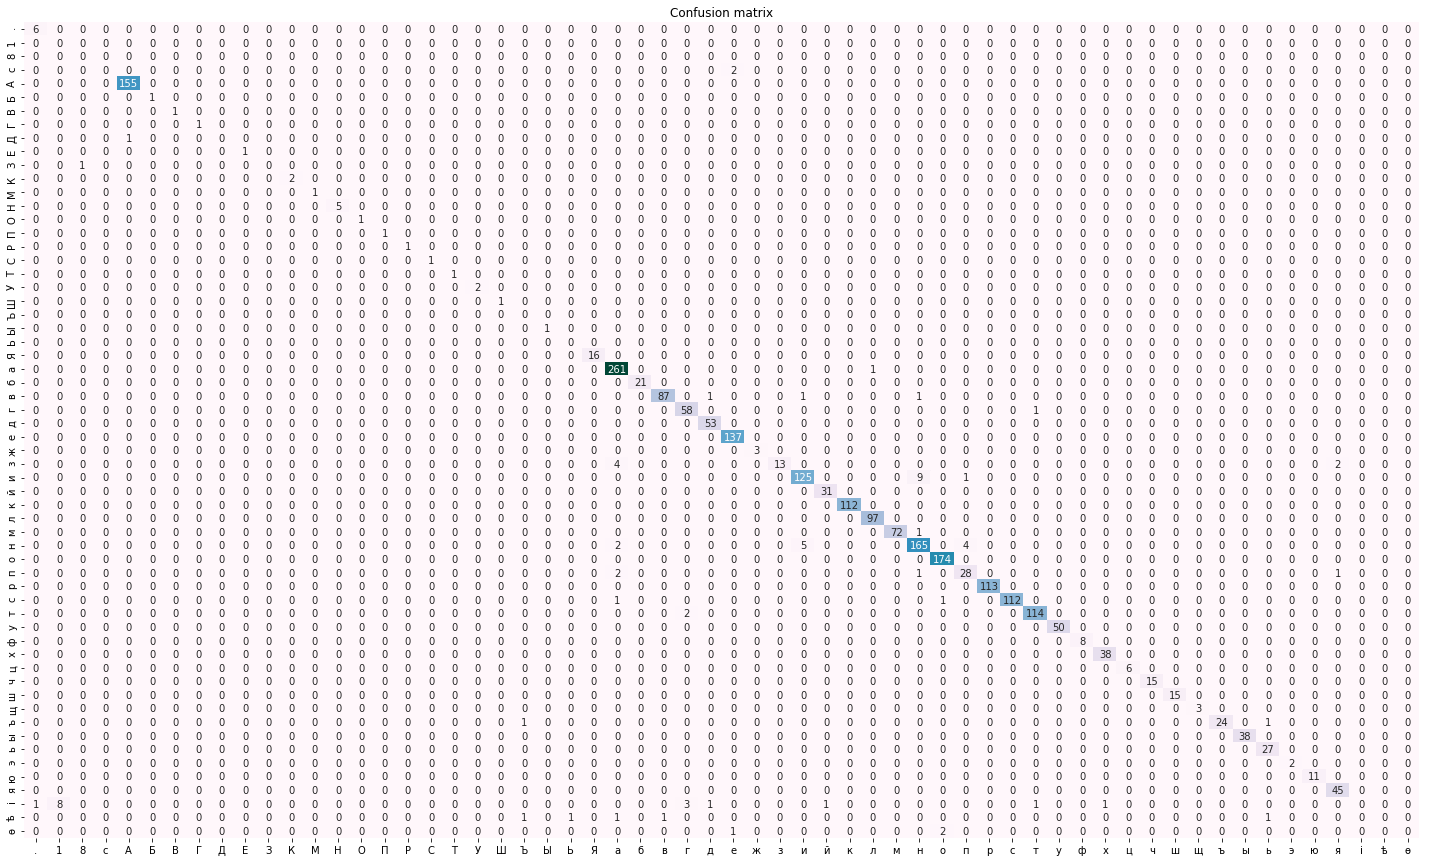

In [269]:
# alphabeth = 'í́абвгдеёжзийклмнопрстуфхцчшщъыьэюяіѣѳѵ0123456789'
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *
from sklearn.feature_extraction.text import *
sub_labels = sorted(list(set(correct_subs_elements+error_subs_elements)))
print(sub_labels)
plt.figure(figsize=(25,15))
sns.heatmap(data=confusion_matrix(correct_subs_elements, error_subs_elements),annot=True,fmt='d', cbar=False, xticklabels=sub_labels,yticklabels=sub_labels, cmap='PuBuGn')#,fmt='d', annot=True,)
plt.title("Confusion matrix")
plt.show()

#### Для удалений

['.', 'А', 'Б', 'В', 'Г', 'Д', 'Е', 'ЕЙ', 'К', 'Л', 'М', 'Н', 'НА', 'О', 'П', 'Р', 'С', 'Т', 'У', 'Ш', 'Я', 'а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'ка', 'л', 'м', 'н', 'о', 'оп', 'п', 'р', 'с', 'ст', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я']


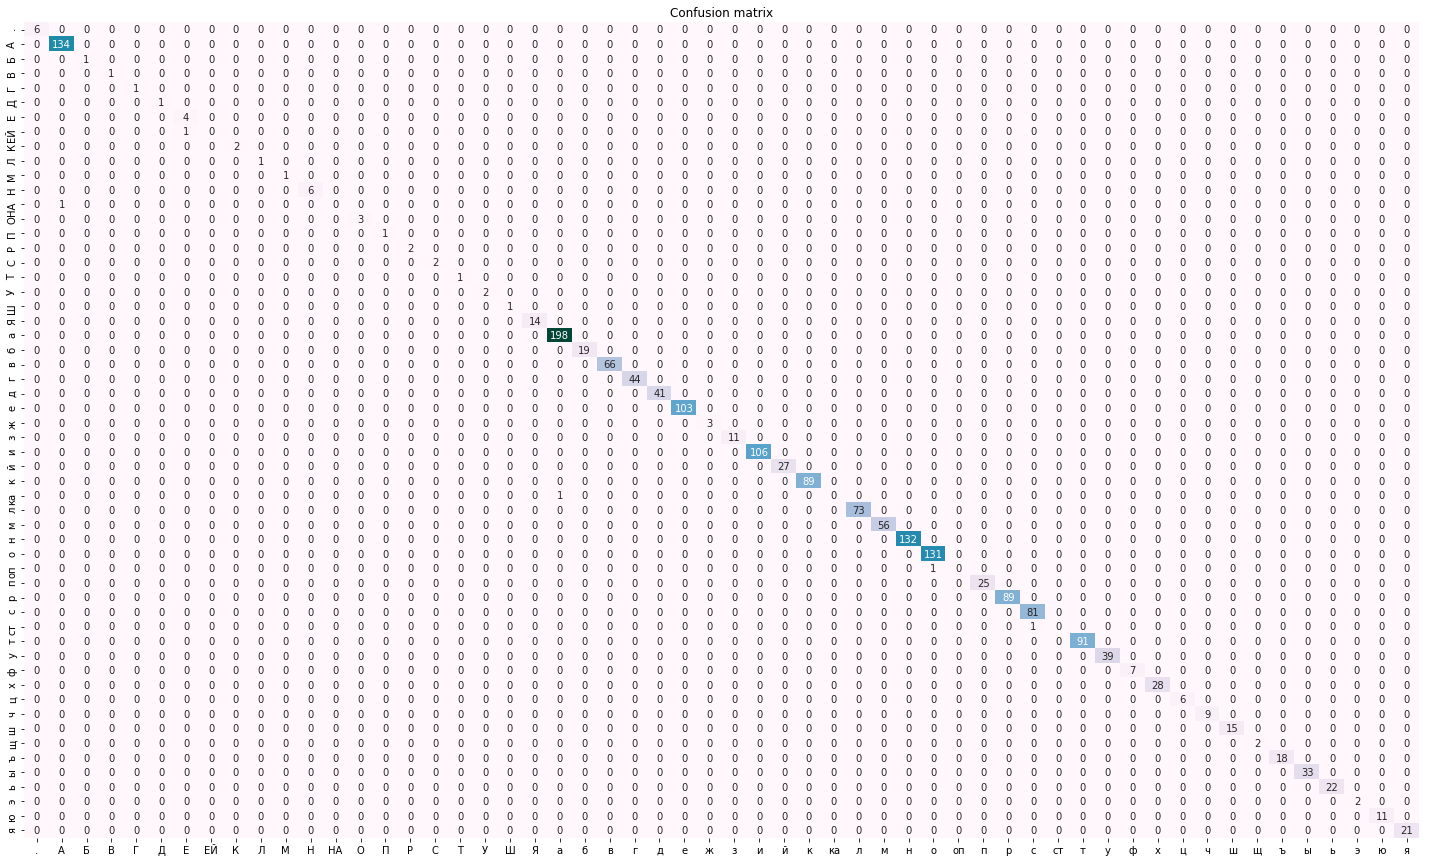

In [270]:
del_labels = sorted(list(set(correct_dels_elements+error_dels_elements)))
print(del_labels)
plt.figure(figsize=(25,15))
sns.heatmap(data=confusion_matrix(correct_dels_elements, error_dels_elements),annot=True,fmt='d', cbar=False, xticklabels=del_labels,yticklabels=del_labels, cmap='PuBuGn')#,fmt='d', annot=True,)
plt.title("Confusion matrix")
plt.show()

#### Для вставок

['.', 'А', 'Б', 'В', 'Г', 'Е', 'К', 'М', 'Н', 'О', 'П', 'Р', 'С', 'Т', 'У', 'Ш', 'Я', 'а', 'а2', 'б', 'в', 'в1', 'г', 'д', 'е', 'ж', 'з', 'и', 'и1', 'й', 'й3', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я']


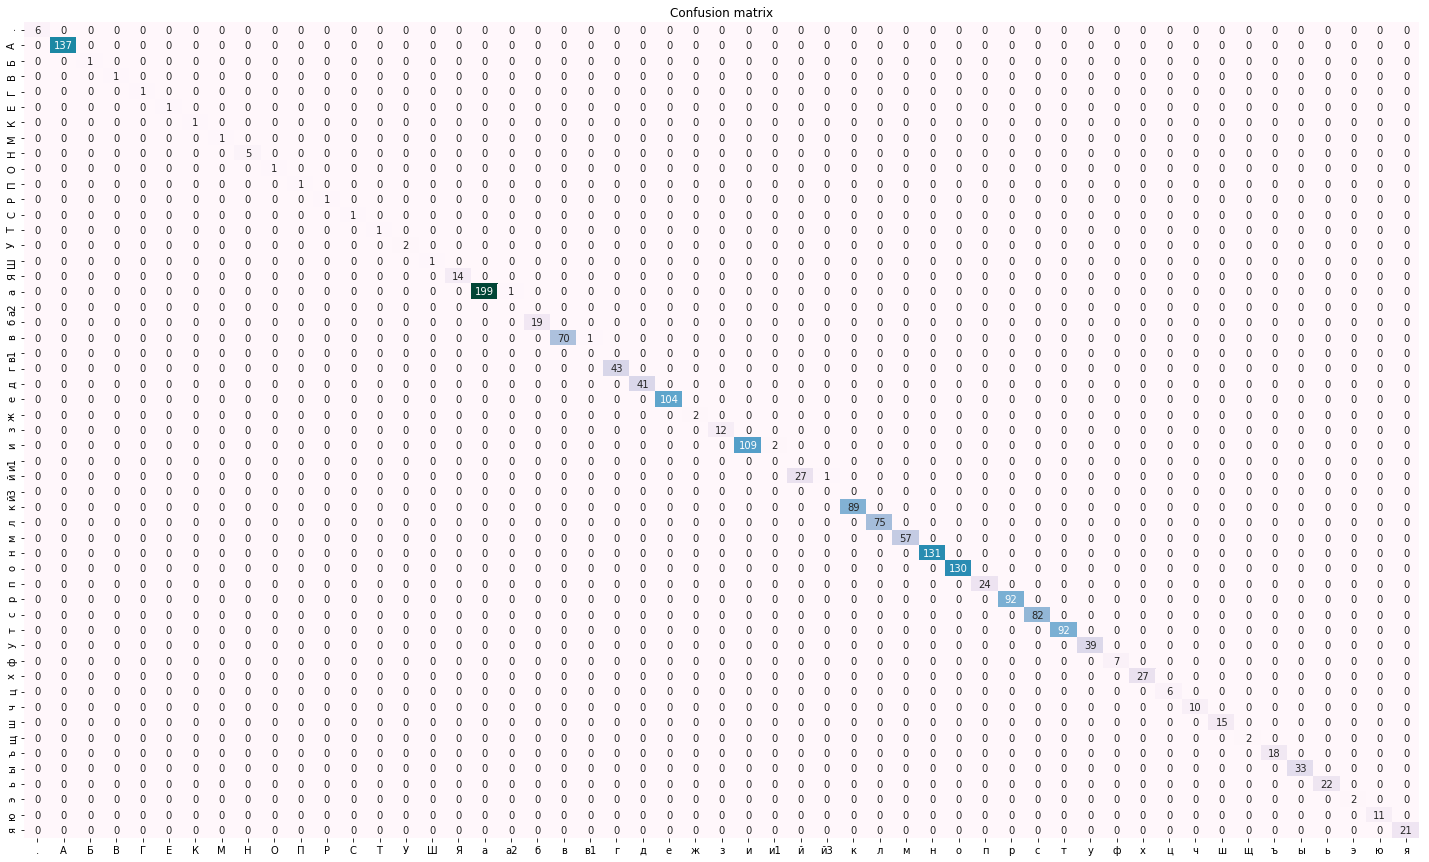

In [271]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *
from sklearn.feature_extraction.text import *
ins_labels = sorted(list(set(correct_ins_elements+error_ins_elements)))
print(ins_labels)
plt.figure(figsize=(25,15))
sns.heatmap(data=confusion_matrix(correct_ins_elements, error_ins_elements),annot=True,fmt='d', cbar=False, xticklabels=ins_labels,yticklabels=ins_labels, cmap='PuBuGn')#,fmt='d', annot=True,)
plt.title("Confusion matrix")
plt.show()

In [272]:
sub_counts=Counter(error_df[error_df.editop=='replace']['e|w'].astype(str).tolist())
ins_counts=Counter(error_df[error_df.editop=='insert']['e|w'].astype(str).tolist())
del_counts=Counter(error_df[error_df.editop=='delete']['e|w'].astype(str).tolist())
char_counts=Counter([char if char!='-' else error_df['e|w'][i][-1] for i, char in enumerate(error_df.correct_char.astype(str).tolist())])

In [277]:
def P_ew(editop, e,w):
    if editop=='replace':
        return check_cofusion_mtrx(sub_labels,confusion_matrix(correct_subs_elements, error_subs_elements),e,w)
    elif editop=='insert':
        return check_cofusion_mtrx(ins_labels,confusion_matrix(correct_ins_elements, error_ins_elements),e,w)
    elif editop=='delete':
        return check_cofusion_mtrx(ins_labels,confusion_matrix(correct_dels_elements, error_dels_elements),e,w)
    else:
        return 0.0001 # костыль 

In [278]:
def check_cofusion_mtrx(labels,cm,e, w):
    if e in labels:
        if w in labels:
            e_idx = labels.index(e)
            w_idx= labels.index(w)
            return(cm[w_idx, e_idx]/(sum(cm[w_idx,:])))
    else:
        if w in labels:
            w_idx= labels.index(w)
            return(1/(sum(cm[:, w_idx])))
    return(1/(cm.shape[0]*cm.shape[1]))             

In [275]:
check_cofusion_mtrx(ins_labels,np.add(1,confusion_matrix(correct_ins_elements, error_ins_elements)),'а2', 'и')

0.006097560975609756

In [279]:
P_ew('replace', 'ь','ъ')

0.038461538461538464

In [297]:
P_ew('replace', 'а','п')

0.009523809523809525

In [280]:
P_ew('insert', 'а2','а')

0.005